<a href="https://colab.research.google.com/github/udaygrover0/Fraud-Analytics-Anomaly-Detection-/blob/main/ELECTRICTY_ANOMALY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection in time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.rcParams["figure.figsize"] = (9,6)

## Read the data

The dataset can be downloaded from [GitHub](https://github.com/numenta/NAB/blob/master/data/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv)

The labels can be obtained from [GitHub](https://github.com/numenta/NAB/blob/master/labels/combined_labels.json)

This is real-life data on CPU utilization of an EC2 instance in the AWS cloud. Data was recorded every 5 minutes, starting on February 14th at 14:30. The dataset contains 4032 data points. It is available through the Numenta Anomaly Benchmark (NAB) repository under the AGPL-3.0 license.

In [42]:
df = pd.read_csv('/content/drive/MyDrive/FAAD/Electric_Production_outliers.csv') # Downloaded from the link above
df.head()

,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,01-02-1985,70.6720
2,01-03-1985,62.4502
3,01-04-1985,57.4714
4,01-05-1985,55.3151


In [43]:
# Labels taken from the link above. We are looking at the labels for ec2_cpu_utilization_24ae8d dataset

anomalies_timestamp = [
        "01-05-2017", "01-05-2013", "01-05-2016"    ]

In [44]:
df['DATE'] = pd.to_datetime(df['DATE'])

df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151


In [45]:
df['is_anomaly'] = 1

for each in anomalies_timestamp:
    df.loc[df['DATE'] == each, 'is_anomaly'] = -1

df.head()

,DATE,IPG2211A2N,is_anomaly
0,1985-01-01,72.5052,1
1,1985-01-02,70.6720,1
2,1985-01-03,62.4502,1
3,1985-01-04,57.4714,1
4,1985-01-05,55.3151,1


In [46]:
anomaly_df = df.loc[df['is_anomaly'] == -1]
inlier_df = df.loc[df['is_anomaly'] == 1]

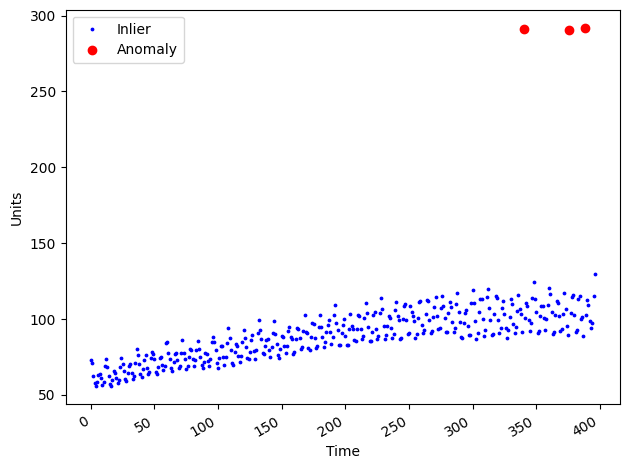

In [49]:
fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['IPG2211A2N'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['IPG2211A2N'], color='red', label='Anomaly')
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()

## Baseline: median absolute deviation (MAD)

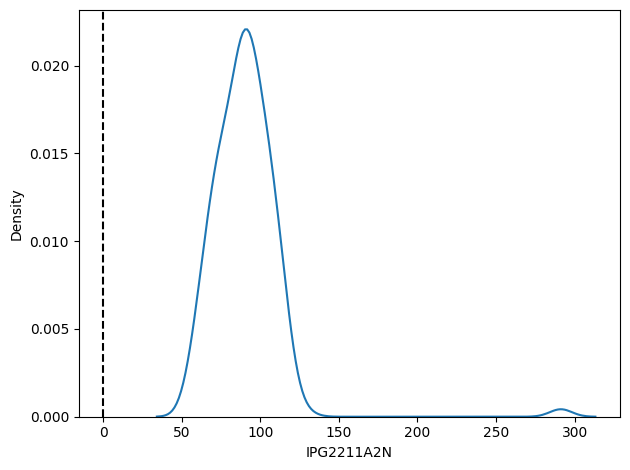

In [50]:
import seaborn as sns

sns.kdeplot(df['IPG2211A2N']);
plt.grid(False)
plt.axvline(0.134, 0, 1, c='black', ls='--')
plt.tight_layout()

In [51]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df['IPG2211A2N'])
median = np.median(df['IPG2211A2N'])

print(median)
print(mad)

def compute_robust_z_score(x):
    return .6745*(x-median)/mad

89.7795
12.015299999999996


In [52]:
df['z-score'] = df['IPG2211A2N'].apply(compute_robust_z_score)

df.head()

,DATE,IPG2211A2N,is_anomaly,z-score
0,1985-01-01,72.5052,1,-0.969723
1,1985-01-02,70.6720,1,-1.072633
2,1985-01-03,62.4502,1,-1.534178
3,1985-01-04,57.4714,1,-1.813672
4,1985-01-05,55.3151,1,-1.934720


from matplotlib import pyplot as plt
_df_9['IPG2211A2N'].plot(kind='hist', bins=20, title='IPG2211A2N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['z-score'].plot(kind='hist', bins=20, title='z-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='IPG2211A2N', y='z-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['IPG2211A2N']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('IPG2211A2N')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['z-score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('z-score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DATE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DATE'}, axis=1)
              .sort_values('DATE', ascending=True))
  xs = counted['DATE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['IPG2211A2N']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('IPG2211A2N')

from matplotlib import pyplot as plt
_df_16['IPG2211A2N'].plot(kind='line', figsize=(8, 4), title='IPG2211A2N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['z-score'].plot(kind='line', figsize=(8, 4), title='z-score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
df['baseline'] = 1

df.loc[df['z-score'] >= 3.5, 'baseline'] = -1
df.loc[df['z-score'] <=-3.5, 'baseline'] = -1

### Evaluation

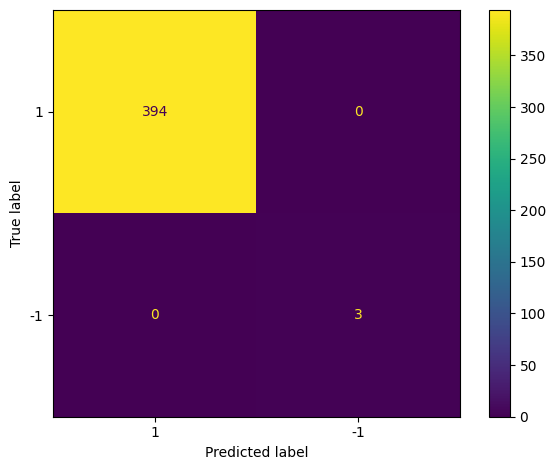

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['is_anomaly'], df['baseline'], labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

## Isolation forest

In [55]:
from sklearn.ensemble import IsolationForest

In [57]:
train = df[:279]
test = df[119:]

In [59]:
#contamination = 1/len(train)

iso_forest = IsolationForest(contamination=0.01, random_state=42)

X_train = train['IPG2211A2N'].values.reshape(-1,1)

iso_forest.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [61]:
preds_iso_forest = iso_forest.predict(test['IPG2211A2N'].values.reshape(-1,1))

### Evaluation

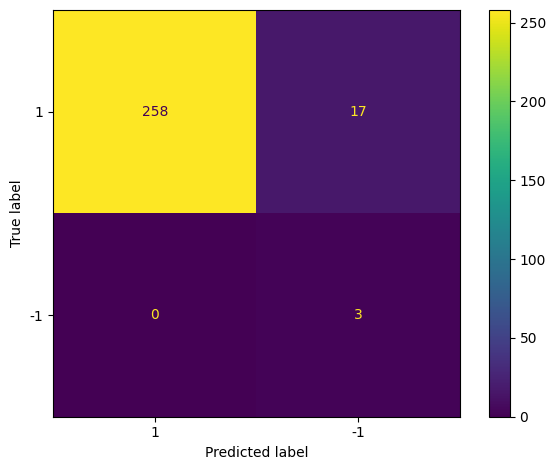

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['is_anomaly'], preds_iso_forest, labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

## Local outlier factor (LOF)

In [63]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.01, novelty=True)

lof.fit(X_train)

LocalOutlierFactor(contamination=0.01, novelty=True)

In [64]:
preds_lof = lof.predict(test['IPG2211A2N'].values.reshape(-1,1))

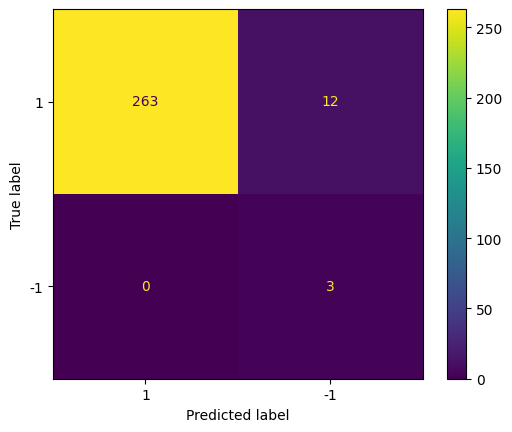

In [65]:
cm = confusion_matrix(test['is_anomaly'], preds_lof, labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();